# Detecção de tipo de doença eritemato-escamosa

Neste projeto, vou criar um modelo de aprendizado de máquina para detectar doenças do tipo eritemato-escamosas. O projeto envolve aprendizado supervisionado, utilizando um conjunto de treinamento rotulado para classificação, onde existem seis classes diferentes.

O diagnóstico diferencial de doenças eritêmato-escamosas é um problema real na dermatologia. Todas elas compartilham características clínicas de eritema e descamação, com muito poucas diferenças. As doenças deste grupo são psoríase, dermatite seborreica, líquen plano, pitiríase rósea, dermatite crônica e pitiríase rubra pilar. 

Geralmente, uma biópsia é necessária para o diagnóstico, mas infelizmente essas doenças também compartilham muitas características histopatológicas. Outra dificuldade para o diagnóstico diferencial é que uma doença pode apresentar características de outra doença no estágio inicial e pode ter as características características nos estágios seguintes. Os pacientes foram primeiramente avaliados clinicamente com 12 características. 

Depois, amostras de pele foram coletadas para a avaliação de 22 características histopatológicas. Os valores das características histopatológicas são determinados por uma análise das amostras sob um microscópio.

## 1. Bibliotecas

In [1]:
# Manipulação e visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Filtragem de mensagens de warning e configuração de visualização de tabelas
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### Configurações de visualização
%matplotlib inline

mpl.style.use('ggplot') 

mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['figure.dpi']          = 150
mpl.rcParams['axes.grid']           = True
mpl.rcParams['font.size']           = 10

# Configurações de paleta de cores
color_palette = ['#FC9F5B', '#FBD1A2', '#ECE4B7', '#B5DAB7', '#7DCFB6', '#33CA7F']
# Aplicar a paleta de cores
sns.set_palette(sns.color_palette(color_palette))
# Display
sns.color_palette(color_palette)

[(0.9882352941176471, 0.6235294117647059, 0.3568627450980392),
 (0.984313725490196, 0.8196078431372549, 0.6352941176470588),
 (0.9254901960784314, 0.8941176470588236, 0.7176470588235294),
 (0.7098039215686275, 0.8549019607843137, 0.7176470588235294),
 (0.49019607843137253, 0.8117647058823529, 0.7137254901960784),
 (0.2, 0.792156862745098, 0.4980392156862745)]

## 2. Interpretação dos dados

- O conjunto de dados foram coletadas no [Kaggle](https://www.kaggle.com/datasets/olcaybolat1/dermatology-dataset-classification?resource=download)
- O conjunto de dados originais estão disponíveis no site do [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/33/dermatology).
- No conjunto de dados construído para este domínio, o recurso de histórico familiar tem o valor 1 se alguma dessas doenças tiver sido observada na família e 0 caso contrário. 
- O recurso de idade simplesmente representa a idade do paciente. 
- Todos os outros recursos (clínicos e histopatológicos) receberam um grau na faixa de 0 a 3. Aqui, 0 indica que o recurso não estava presente, 3 indica a maior quantidade possível e 1, 2 indicam os valores intermediários relativos.


In [2]:
df = pd.read_csv('../input/dermatology_database_1.csv')
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_infiltrate,PNL_infiltrate,fibrosis_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_rete_ridges,elongation_rete_ridges,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3


### Dicionário de dados

**Atributos Clínicos:**
  - 1: erythema
  - 2: scaling
  - 3: definite borders
  - 4: itching
  - 5: koebner phenomenon
  - 6: polygonal papules
  - 7: follicular papules
  - 8: oral mucosal involvement
  - 9: knee and elbow involvement
  - 10: scalp involvement
  - 11: family history, (0 or 1)
  - 34: Age (linear)

**Atributos Histopatológicos:**
  - 12: melanin incontinence
  - 13: eosinophils in the infiltrate
  - 14: PNL infiltrate
  - 15: fibrosis of the papillary dermis
  - 16: exocytosis
  - 17: acanthosis
  - 18: hyperkeratosis
  - 19: parakeratosis
  - 20: clubbing of the rete ridges
  - 21: elongation of the rete ridges
  - 22: thinning of the suprapapillary epidermis
  - 23: spongiform pustule
  - 24: munro microabcess
  - 25: focal hypergranulosis
  - 26: disappearance of the granular layer
  - 27: vacuolisation and damage of basal layer
  - 28: spongiosis
  - 29: saw-tooth appearance of retes
  - 30: follicular horn plug
  - 31: perifollicular parakeratosis
  - 32: inflammatory monoluclear inflitrate
  - 33: band-like infiltrate

**Target**
  - 1: psoriasis
  - 2: seboreic dermatitis
  - 3: lichen planus
  - 4: pityriasis rosea
  - 5: cronic dermatitis    
  - 6: pityriasis rubra pilaris


Analisando as informações gerais do conjunto de dados:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [4]:
print(f'O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.')

O dataset possui 366 linhas e 35 colunas.


Descrição estatística dos dados:

In [5]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
erythema,366.0,2.0,1.0,0.0,2.0,2.0,2.0,3.0
scaling,366.0,2.0,1.0,0.0,1.0,2.0,2.0,3.0
definite_borders,366.0,2.0,1.0,0.0,1.0,2.0,2.0,3.0
itching,366.0,1.0,1.0,0.0,0.0,1.0,2.0,3.0
koebner_phenomenon,366.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0
polygonal_papules,366.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
follicular_papules,366.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
oral_mucosal_involvement,366.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
knee_and_elbow_involvement,366.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0
scalp_involvement,366.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0


Verificando a existência de dados nulos.

In [6]:
df.isna().sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

Verificando a existência de dados duplicados.

In [7]:
df.duplicated().sum()

0

Não há existência de dados nulos e duplicadas.

- Foi realizado o tratamento e a conversão dos dados da coluna 'age' para o tipo inteiro.

Durante a análise dos dados da coluna 'age', observei que alguns valores estão preenchidos com '?'. Como isso ocorre em apenas 8 linhas, optei por excluí-las antes de converter os dados para o tipo inteiro.

In [8]:
# Verificando os valores únicos da coluna 'age'.
df['age'].unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '?', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [9]:
# Visualizando a quantidade de linhas com valores '?'
linhas_idade_indefinida = df.loc[df['age'] == '?']
linhas_idade_indefinida

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_infiltrate,PNL_infiltrate,fibrosis_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_rete_ridges,elongation_rete_ridges,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
33,2,2,1,0,0,0,0,0,1,0,1,0,0,2,0,0,2,1,2,2,1,2,0,1,0,0,0,0,0,0,0,0,0,?,1
34,2,1,0,0,2,0,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,4
35,2,2,1,2,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,2
36,2,1,2,3,2,3,0,2,0,0,1,1,0,0,0,2,1,1,2,0,0,0,0,0,1,0,2,0,2,0,0,0,3,?,3
262,2,1,0,2,0,0,0,0,0,0,0,0,0,0,2,1,3,2,2,1,3,0,0,0,0,0,0,2,0,0,0,3,0,?,5
263,1,1,1,3,0,0,0,0,0,0,0,0,0,0,3,2,3,1,2,2,2,0,0,0,0,0,0,3,0,0,0,2,0,?,5
264,1,1,0,2,0,0,0,0,1,0,0,0,0,0,3,2,3,2,1,1,3,0,0,0,0,0,0,2,0,0,0,3,0,?,5
265,1,1,0,3,0,0,0,0,0,0,0,0,0,0,2,1,3,1,1,0,2,0,1,0,0,0,0,2,0,0,0,3,0,?,5


In [10]:
# Removendo as linhas com valores '?'
df.drop(linhas_idade_indefinida.index, inplace=True)

# Convertendo a coluna 'age' para o tipo inteiro.
df['age'] = df['age'].astype('int64')

# Resetando o índice do DataFrame
df.reset_index(drop=True, inplace=True)

# Verificando o dataset após a remoção das linhas com valores '?' e a conversão da coluna 'age' para o tipo inteiro.
df

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_infiltrate,PNL_infiltrate,fibrosis_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_rete_ridges,elongation_rete_ridges,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25,4
354,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36,4
355,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28,3
356,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50,3


In [11]:
print(f'Após o tratamento, o dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.')

Após o tratamento, o dataset possui 358 linhas e 35 colunas.


Abaixo é possível verificar a quantidade de ocorrências de cada classe.

In [12]:
df['class'].value_counts().sort_index()

class
1    111
2     60
3     71
4     48
5     48
6     20
Name: count, dtype: int64

## 3. Análise Exploratória de Dados

Nesta seção, utilizamos técnicas de visualização de dados para explorar visualmente e comunicar insights do conjunto de dados de dermatologia. Ao criar representações visuais significativas e informativas, como gráficos, tabelas e diagramas, pretendemos descobrir padrões, relacionamentos e tendências nos dados.

A visualização de dados aprimora nossa compreensão do conjunto de dados, facilitando a transmissão das descobertas e das principais mensagens às partes interessadas e aos tomadores de decisão. Por meio de visualizações eficazes, podemos destacar padrões e correlações importantes, permitindo uma tomada de decisão mais bem informada e insights acionáveis.

### 3.1 Distribuição de idade dos pacientes

Podemos observar que a idade mínima registrada é de 0 anos, enquanto a idade máxima aproximada é de 75 anos. Notavelmente, a maioria dos pacientes está concentrada na faixa etária entre 20 e 50 anos.

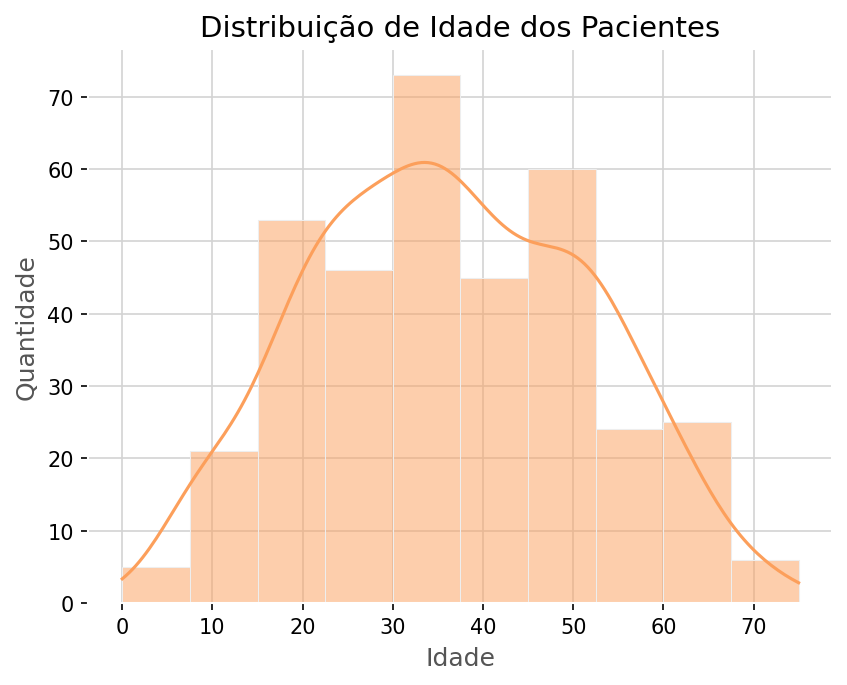

In [13]:
sns.histplot(data=df, x='age', bins=10, kde=True)
plt.title('Distribuição de Idade dos Pacientes', fontsize=14)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.show()

### 3.2 Distribuição das Classes

Podemos observar que a maioria dos pacientes neste conjunto de dados foi diagnosticada com psoríase. Em segundo lugar, está o líquen plano, seguido pela dermatite seborreica em terceiro.

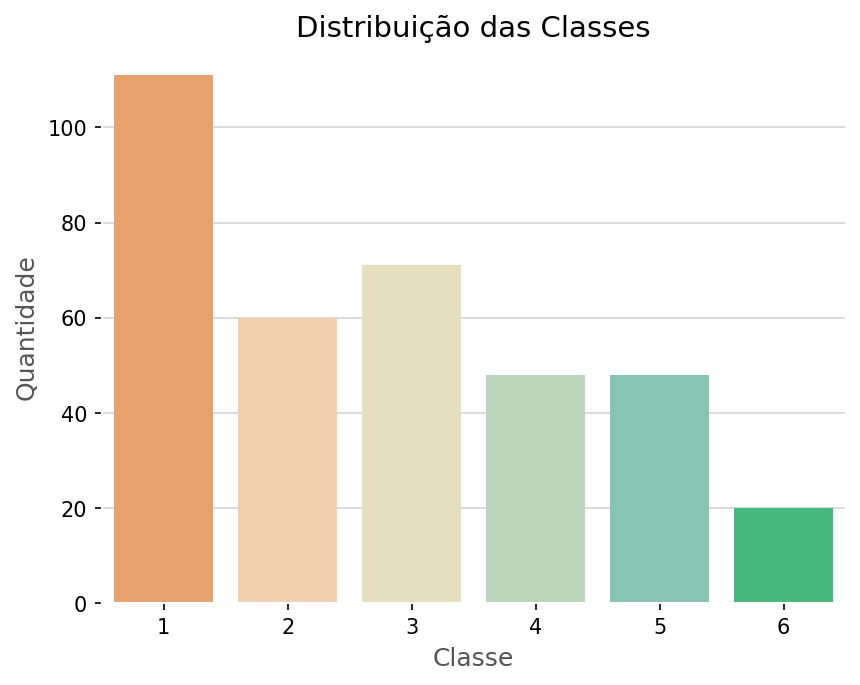

In [14]:
sns.countplot(data=df, x='class')
plt.title('Distribuição das Classes', fontsize=14)
plt.xlabel('Classe', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.show()

### 3.3 Mapa de Correlação

No mapa de calor abaixo, podemos observar as variáveis fortemente correlacionadas, o que pode indicar uma relação significativa entre elas.

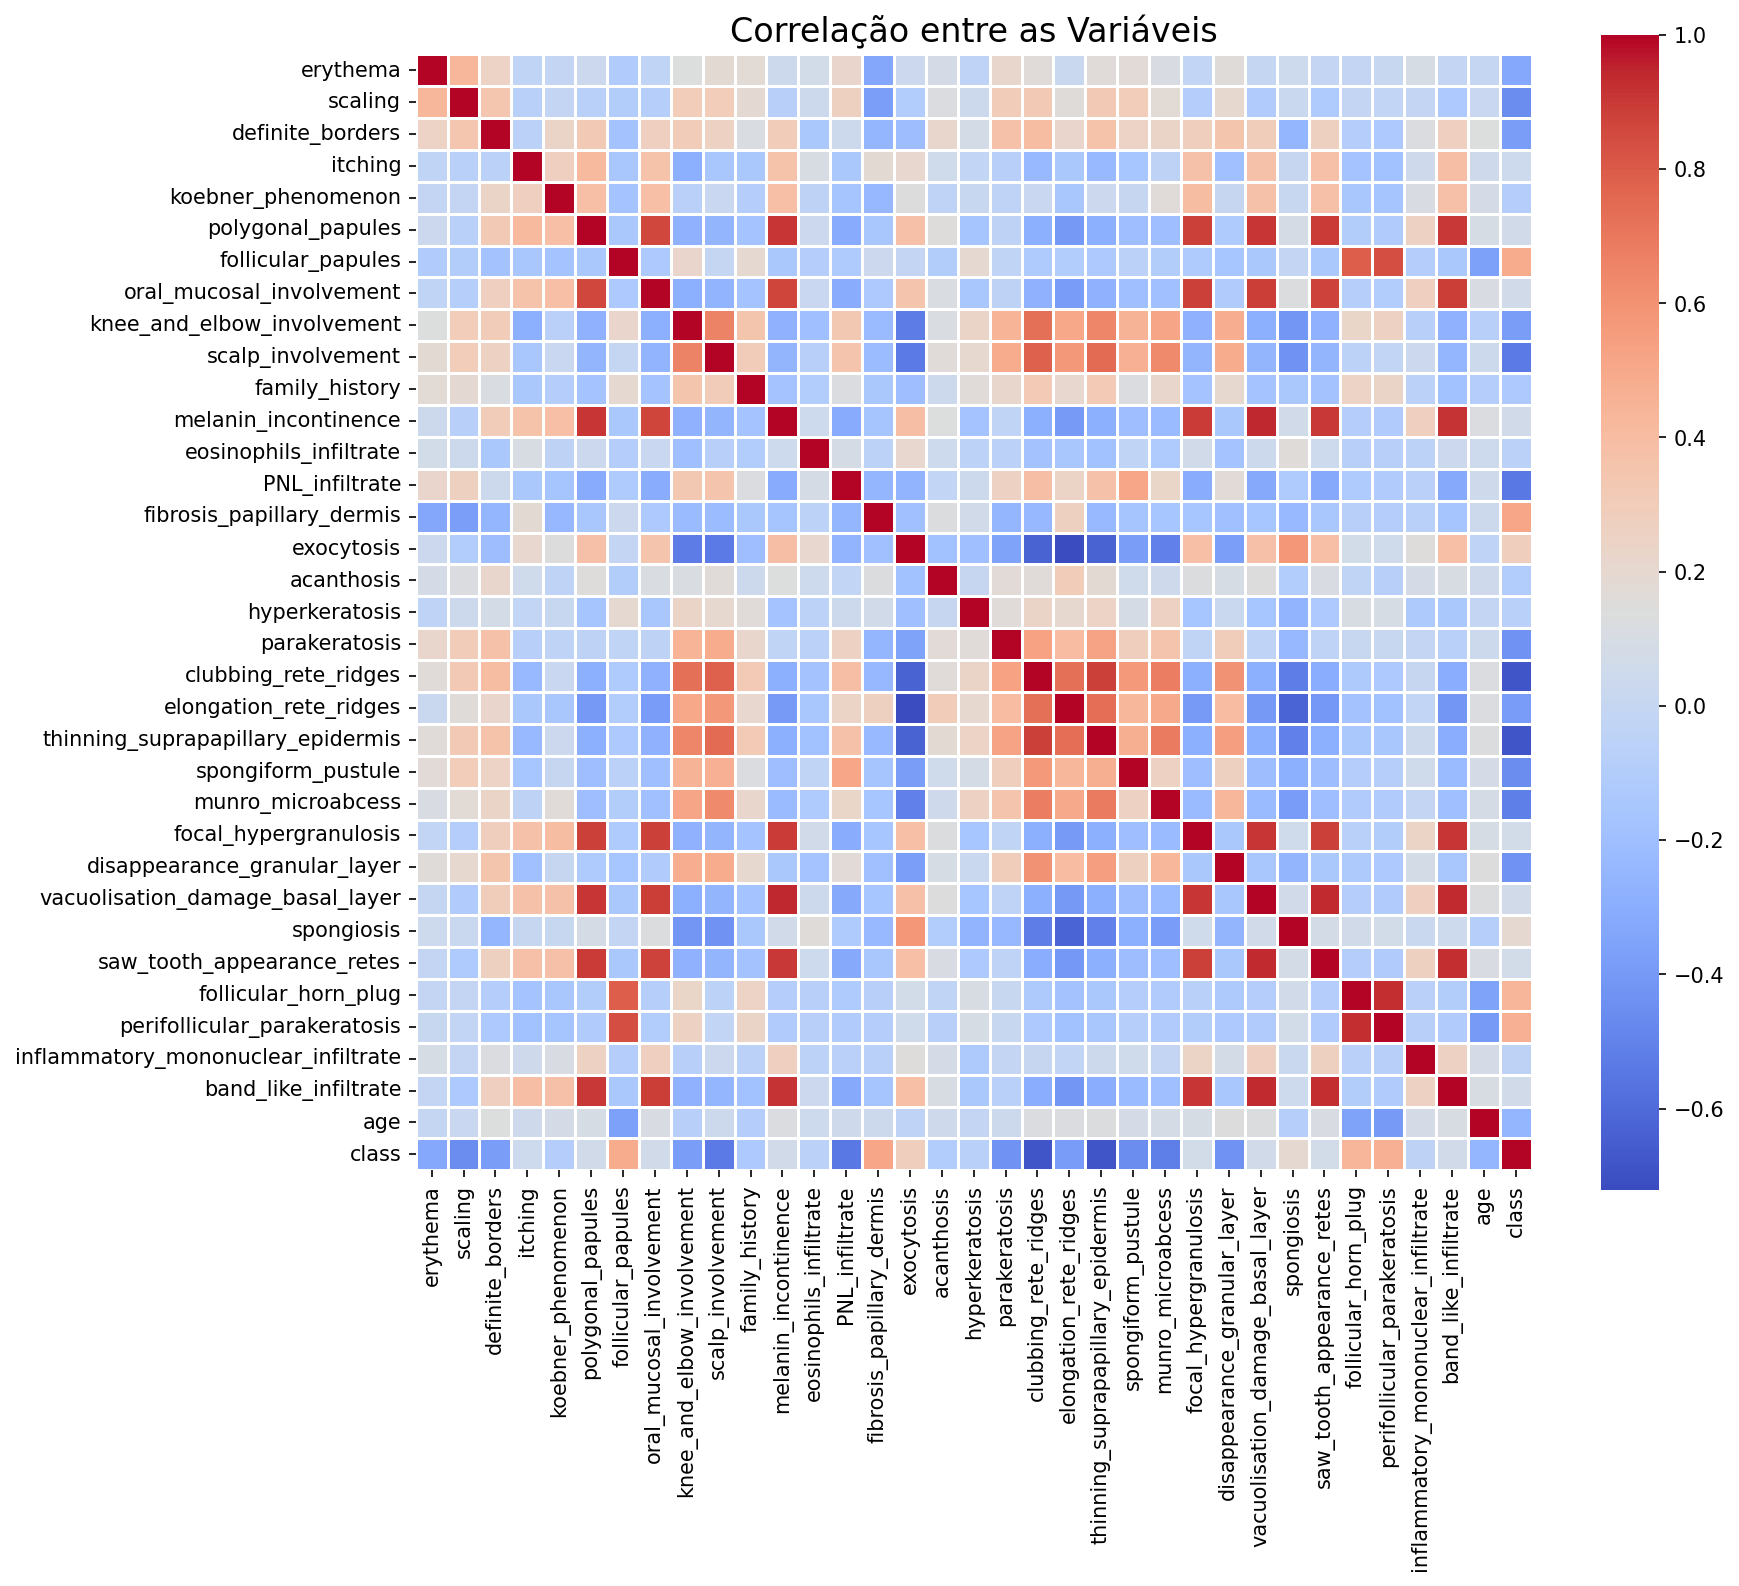

In [15]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', cbar=True, square=True, linewidths=.5)
plt.title('Correlação entre as Variáveis', fontsize=16)
plt.show()